In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from tensorflow import keras 
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape, x_train[:1].shape

((60000, 28, 28), (1, 28, 28))

## Data Preparation

In [4]:
model = lambda x: x * 2.0 + 1.0
x_train = np.array([0, 1])
y_train = model(x_train)
x_test = np.array([2,3,4])
y_test = model(x_test)

x_train_tf = x_train.reshape(-1,1)
y_train_tf = y_train.reshape(-1,1)
x_test_tf = x_test.reshape(-1,1)
y_test_tf = y_test.reshape(-1,1)

#x_train_tf = tf.Variable(x_train_tf)
#y_train_tf = tf.Variable(y_train_tf)
#x_test_tf = tf.Variable(x_test_tf)
#x_test_tf = tf.Variable(x_test_tf)

## Function Definitinos

In [5]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD()
test_loss = tf.keras.metrics.Mean(name='test_loss')

2022-01-24 00:36:31.445304: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-24 00:36:31.445654: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-24 00:36:31.446935: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Training and Testing

In [6]:
def train_step(x_train, y_train):
    with tf.GradientTape() as tape:
        pred = wb(x_train_tf)
        loss = loss_fn(y_train_tf, pred)
    delta_wb = tape.gradient(loss, wb.trainable_variables)
    optimizer.apply_gradients(zip(delta_wb, wb.trainable_variables))
    
def test_step(x_test, y_test):
    pred = wb(x_train_tf)
    loss = loss_fn(y_train_tf, pred)
    test_loss(loss)

train_step_tf = tf.function(train_step)
test_step_tf = tf.function(test_step)

def train(N_epoch=1000, train_step=train_step, test_step=test_step):
    J_list = np.zeros(N_epoch)
    test_loss.reset_states()    
    for e in range(N_epoch):
        train_step(x_train, y_train)    
        test_step(x_test, y_test)
        J_list[e] = test_loss.result().numpy()
    return J_list

2022-01-24 00:36:32.148342: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-24 00:36:32.154475: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3599995000 Hz


w=2.0, b=1.0


Text(0, 0.5, 'J')

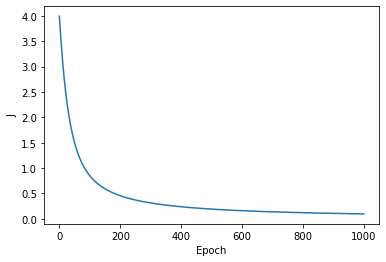

In [7]:
wb = keras.models.Sequential()
wb.add(keras.layers.Dense(1,input_shape=(1,)))

J_list = train(train_step=train_step_tf, test_step=test_step_tf)        
w_tr, b_tr = wb.get_weights()
print(f"w={w_tr[0,0]:.2}, b={b_tr[0]:.2}")

plt.plot(J_list)
plt.xlabel("Epoch")
plt.ylabel("J")

In [8]:
%time J_list = train(N_epoch=100, train_step=train_step)
%time J_list = train(N_epoch=100, train_step=train_step_tf, test_step=test_step_tf)
%time J_list = train(N_epoch=1000, train_step=train_step)
%time J_list = train(N_epoch=1000, train_step=train_step_tf, test_step=test_step_tf)

CPU times: user 1.97 s, sys: 1.8 s, total: 3.76 s
Wall time: 2.01 s
CPU times: user 1.49 s, sys: 1.89 s, total: 3.38 s
Wall time: 570 ms
CPU times: user 22.2 s, sys: 18.3 s, total: 40.4 s
Wall time: 19.2 s
CPU times: user 11.9 s, sys: 16.3 s, total: 28.1 s
Wall time: 4.92 s


In [9]:
16.6/8.28

2.0048309178743966